# Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style="darkgrid")

## Data preparation

In [2]:
bioresponse = pd.read_csv('bioresponse.csv')
bioresponse

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_x, test_x, train_y, test_y = train_test_split(bioresponse.drop("Activity", axis=1), 
                                                    bioresponse["Activity"], 
                                                    test_size = 0.25,
                                                    random_state = 1)

## 1. Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule

- _data_: bioresponse.csv
- _description from Kaggle:_ “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”)
- Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1. + np.exp(-z))
    
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim, 1))
    b = 0.
    
    return w, b


def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                 # compute activation
    cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m) * np.dot(X, (A - Y).T)
    db = (1./m) * np.sum(A - Y,axis=1)

    grads = {"dw": dw,
             "db": db
            }
    
    return grads, cost


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b
             }
    
    grads = {"dw": dw,
             "db": db
            }
    
    return params, grads, costs


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0, i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    
    return Y_prediction


def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False,
          optimizer="gd", batch_size=1):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    if optimizer == "gd":
        # Gradient descent
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif optimizer == "sgd":
        parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost,
                                                batch_size=batch_size)
    elif optimizer == "adam":
        parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100:.3f} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100:.3f} %")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [5]:
train_set_x = train_x.to_numpy().T
train_set_y = train_y.to_numpy().T
test_set_x = test_x.to_numpy().T
test_set_y = test_y.to_numpy().T

gd = model(
    train_set_x, 
    train_set_y, 
    test_set_x, 
    test_set_y, 
    learning_rate = 0.01, 
    print_cost = True,
    optimizer = "gd"
)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.633396
Cost after iteration 200: 0.601225
Cost after iteration 300: 0.578998
Cost after iteration 400: 0.562293
Cost after iteration 500: 0.549066
Cost after iteration 600: 0.538222
Cost after iteration 700: 0.529108
Cost after iteration 800: 0.521302
Cost after iteration 900: 0.514515
Cost after iteration 1000: 0.508539
Cost after iteration 1100: 0.503222
Cost after iteration 1200: 0.498449
Cost after iteration 1300: 0.494131
Cost after iteration 1400: 0.490196
Cost after iteration 1500: 0.486591
Cost after iteration 1600: 0.483268
Cost after iteration 1700: 0.480191
Cost after iteration 1800: 0.477329
Cost after iteration 1900: 0.474657
train accuracy: 78.990 %
test accuracy: 76.226 %


## 2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.

Since it is necessary to implement stochastic gradient descent, we will randomly select batches from the data set.

In [6]:
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False, batch_size=1):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    n_obs = w.shape[0]
    
    for i in range(num_iterations):
        # SGD implementation
        indexes = np.random.randint(0, n_obs, batch_size) # random sample
        Xs = np.take(X, indexes, axis=1)
        ys = np.take(Y, indexes)
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, Xs, ys)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b
             }
    
    grads = {"dw": dw,
             "db": db
            }
    
    return params, grads, costs

In [7]:
sgd = model(
    train_set_x, 
    train_set_y, 
    test_set_x, 
    test_set_y, 
    learning_rate = 0.002, 
    print_cost = True,
    optimizer = "sgd",
    batch_size = 16
)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.634737
Cost after iteration 200: 0.624478
Cost after iteration 300: 0.641232
Cost after iteration 400: 0.641892
Cost after iteration 500: 0.645739
Cost after iteration 600: 0.653941
Cost after iteration 700: 0.626542
Cost after iteration 800: 0.583886
Cost after iteration 900: 0.594761
Cost after iteration 1000: 0.678097
Cost after iteration 1100: 0.602056
Cost after iteration 1200: 0.581481
Cost after iteration 1300: 0.547856
Cost after iteration 1400: 0.579394
Cost after iteration 1500: 0.501094
Cost after iteration 1600: 0.547790
Cost after iteration 1700: 0.563537
Cost after iteration 1800: 0.504478
Cost after iteration 1900: 0.500939
train accuracy: 75.116 %
test accuracy: 73.881 %


## 3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 


In [8]:
models = {
    "GD": gd,
    "SGD": sgd
}

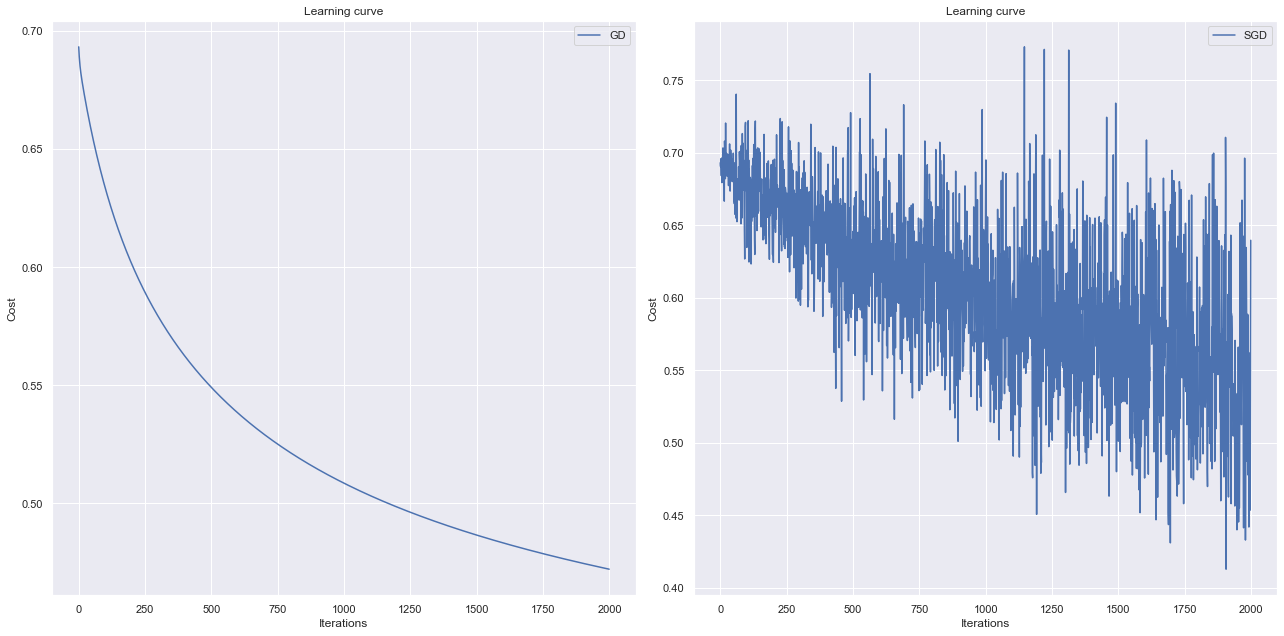

In [9]:
def plot_curves(models):
    fig, ax = plt.subplots(1, len(models))
    fig.set_size_inches(18, 18/len(models))
    
    i = 0
    for model_name in models.keys():
        model = models[model_name]
 
        ax[i].plot(np.arange(0, model["num_iterations"], 1), model["costs"], label=model_name)
        ax[i].legend()
        ax[i].set_title("Learning curve")
        ax[i].set_ylabel("Cost")
        ax[i].set_xlabel("Iterations")
        i += 1

    fig.tight_layout()    
    plt.show()
    

plot_curves(models)

## 4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.

Adam optimization from task #2 was adapted for this input data

In [10]:
# Adaptive Moment Estimation
def optimize_adam(w, b, X, Y, num_iterations, learn_rate, print_cost = False, beta1 = 0.9, beta2 = 0.999, eps = 1e-8):
    costs = []
    n_obs = w.shape[0]
    w_v, w_s, b_v, b_s = 0, 0, 0, 0
    
    for i in range(num_iterations):   
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
    
        w_v = beta1 * w_v + (1. - beta1) * dw
        w_s = beta2 * w_s + (1. - beta2) * np.square(dw)
        
        b_v = beta1 * b_v + (1. - beta1) * db
        b_s = beta2 * b_s + (1. - beta2) * np.square(db)

        w_v_hat = w_v / (1. - beta1 ** (i + 1))
        w_s_hat = w_s / (1. - beta2 ** (i + 1))

        b_v_hat = b_v / (1. - beta1 ** (i + 1))
        b_s_hat = b_s / (1. - beta2 ** (i + 1))

        w = w - (learn_rate / (np.sqrt(w_s_hat) + eps)) * w_v_hat
        b = b - (learn_rate / (np.sqrt(b_s_hat) + eps)) * b_v_hat
    
        costs.append(cost)
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }
    return params, grads, costs

In [11]:
adam = model(
    train_set_x, 
    train_set_y, 
    test_set_x, 
    test_set_y, 
    learning_rate = 0.001, 
    print_cost = True,
    optimizer = "adam",
)
models["Adam"] = adam

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.500659
Cost after iteration 200: 0.441412
Cost after iteration 300: 0.407281
Cost after iteration 400: 0.383427
Cost after iteration 500: 0.365177
Cost after iteration 600: 0.350479
Cost after iteration 700: 0.338235
Cost after iteration 800: 0.327779
Cost after iteration 900: 0.318673
Cost after iteration 1000: 0.310617
Cost after iteration 1100: 0.303392
Cost after iteration 1200: 0.296841
Cost after iteration 1300: 0.290846
Cost after iteration 1400: 0.285315
Cost after iteration 1500: 0.280179
Cost after iteration 1600: 0.275382
Cost after iteration 1700: 0.270880
Cost after iteration 1800: 0.266636
Cost after iteration 1900: 0.262620
train accuracy: 90.473 %
test accuracy: 74.094 %


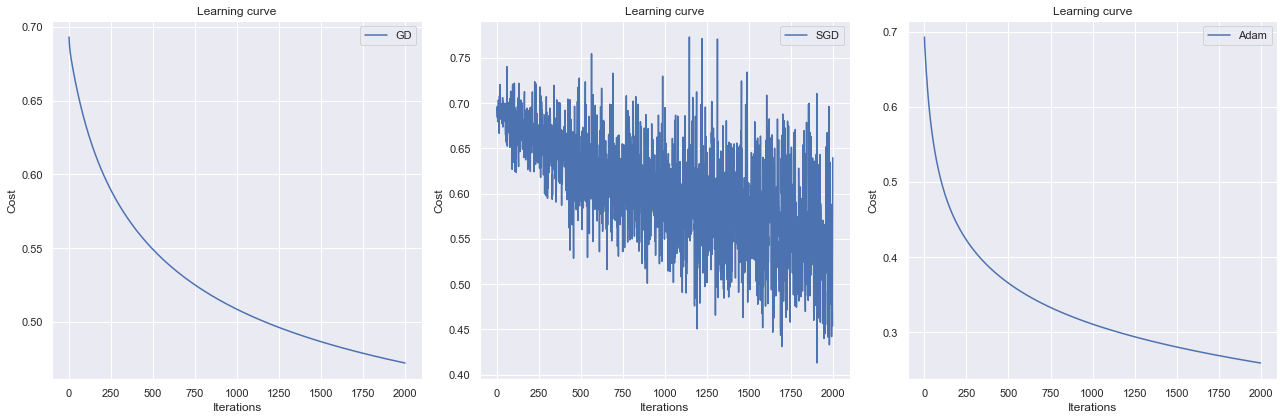

In [12]:
plot_curves(models)

## Testing different learning rate

Learning rate: 0.0005
GD results:
train accuracy: 68.966 %
test accuracy: 71.109 %

SGD results:
train accuracy: 70.636 %
test accuracy: 69.936 %

Adam results:
train accuracy: 88.624 %
test accuracy: 74.840 %


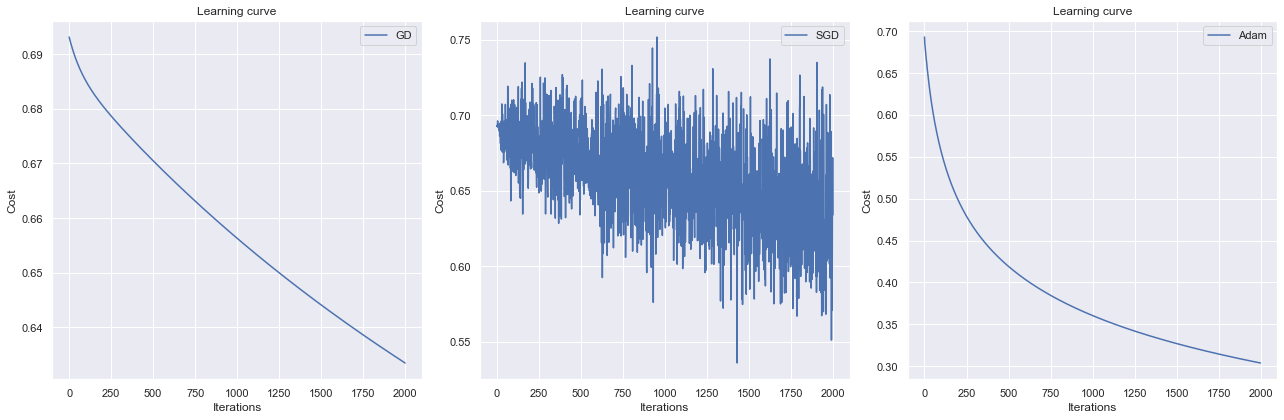

Learning rate: 0.001
GD results:
train accuracy: 73.160 %
test accuracy: 71.962 %

SGD results:
train accuracy: 73.871 %
test accuracy: 72.601 %

Adam results:
train accuracy: 90.473 %
test accuracy: 74.094 %


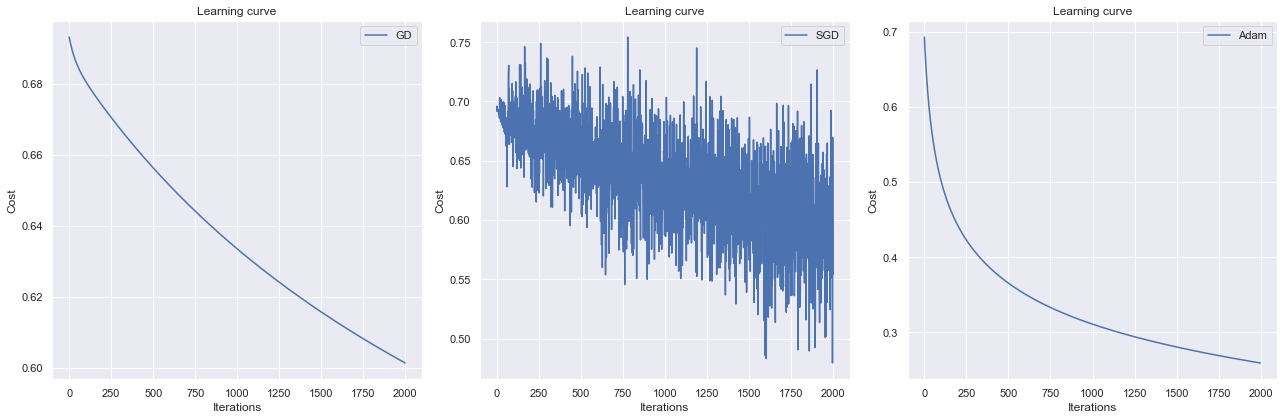

Learning rate: 0.0015
GD results:
train accuracy: 74.120 %
test accuracy: 71.215 %

SGD results:
train accuracy: 74.902 %
test accuracy: 71.962 %

Adam results:
train accuracy: 91.326 %
test accuracy: 75.373 %


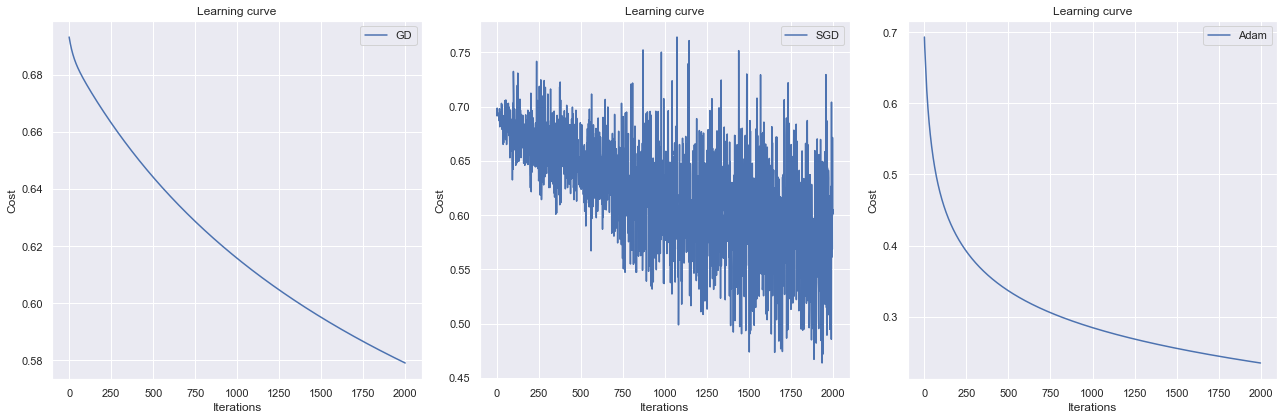

Learning rate: 0.002
GD results:
train accuracy: 74.938 %
test accuracy: 71.962 %

SGD results:
train accuracy: 75.187 %
test accuracy: 71.855 %

Adam results:
train accuracy: 92.073 %
test accuracy: 74.627 %


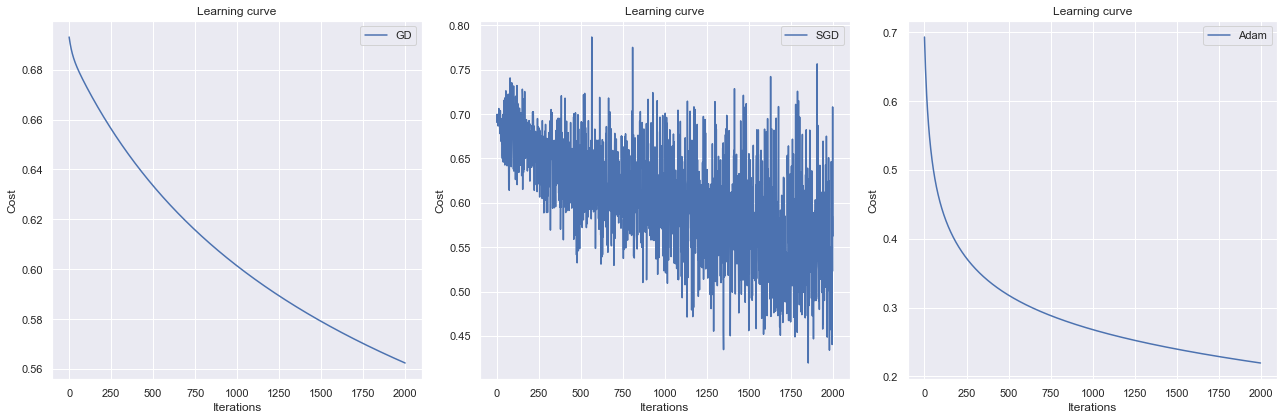

Learning rate: 0.0025
GD results:
train accuracy: 75.471 %
test accuracy: 72.601 %

SGD results:
train accuracy: 75.684 %
test accuracy: 73.134 %

Adam results:
train accuracy: 92.570 %
test accuracy: 74.307 %


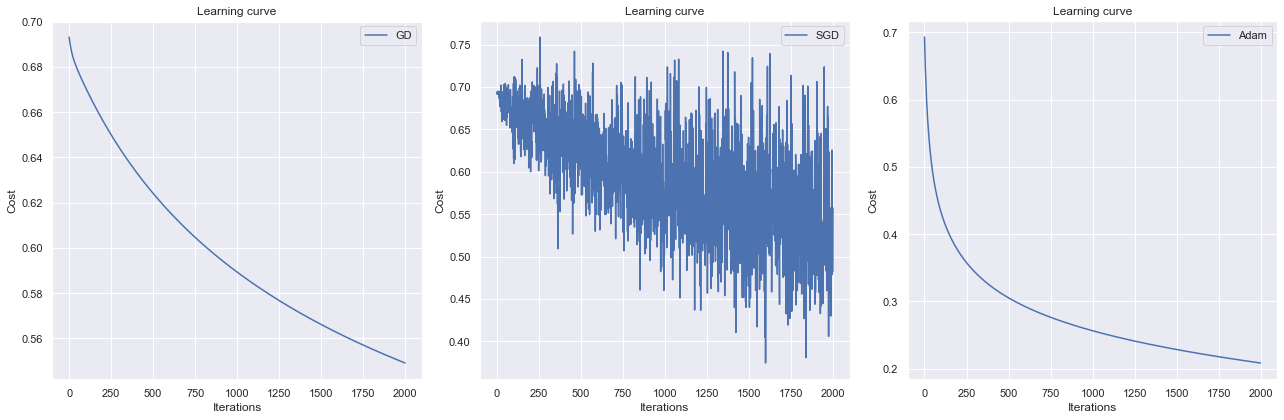

Learning rate: 0.003
GD results:
train accuracy: 75.862 %
test accuracy: 73.348 %

SGD results:
train accuracy: 75.684 %
test accuracy: 73.348 %

Adam results:
train accuracy: 92.997 %
test accuracy: 73.987 %


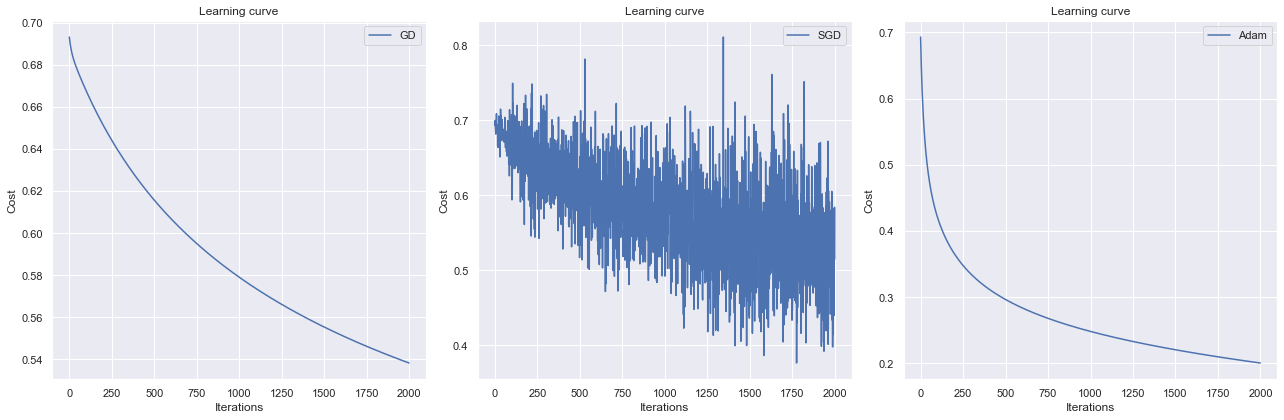

Learning rate: 0.0035
GD results:
train accuracy: 76.182 %
test accuracy: 73.561 %

SGD results:
train accuracy: 76.822 %
test accuracy: 73.881 %

Adam results:
train accuracy: 93.210 %
test accuracy: 74.094 %


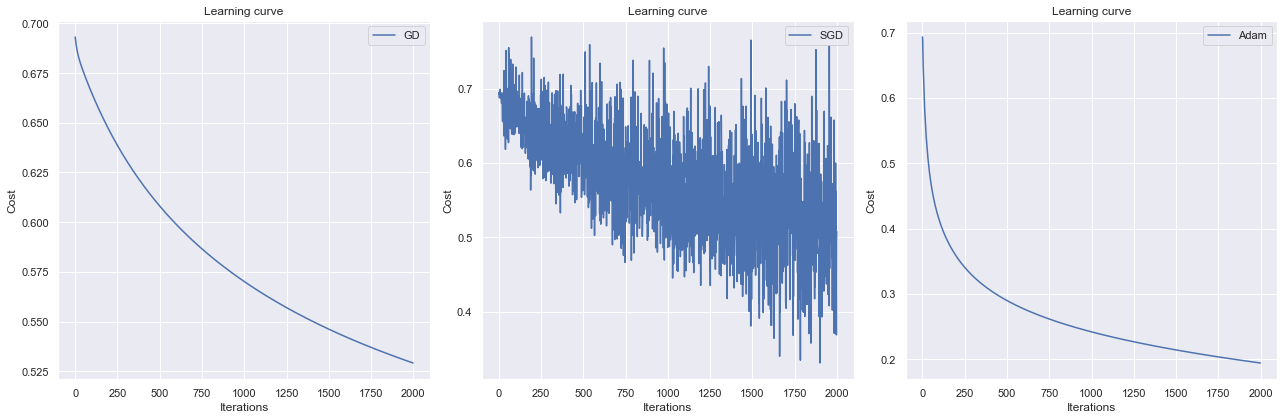

Learning rate: 0.004
GD results:
train accuracy: 76.289 %
test accuracy: 73.774 %

SGD results:
train accuracy: 77.106 %
test accuracy: 74.200 %

Adam results:
train accuracy: 93.566 %
test accuracy: 74.307 %


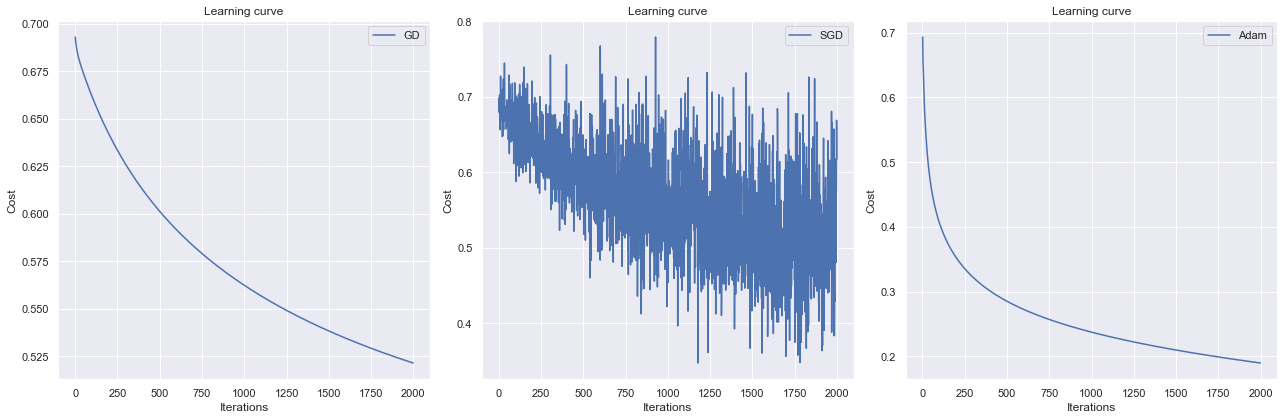

Learning rate: 0.0045000000000000005
GD results:
train accuracy: 76.715 %
test accuracy: 74.307 %

SGD results:
train accuracy: 76.751 %
test accuracy: 73.348 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 93.743 %
test accuracy: 74.307 %


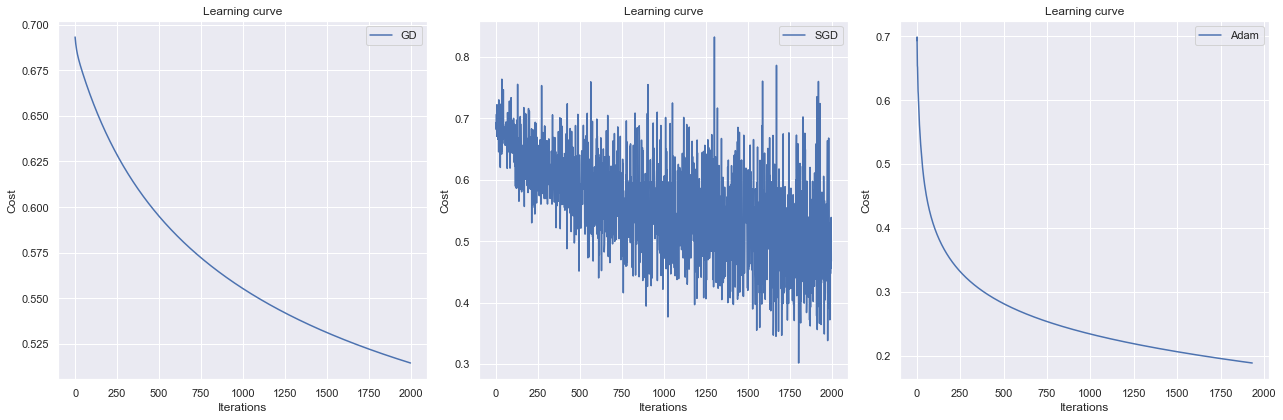

Learning rate: 0.005
GD results:
train accuracy: 77.071 %
test accuracy: 74.627 %

SGD results:
train accuracy: 77.000 %
test accuracy: 73.987 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 93.672 %
test accuracy: 73.987 %


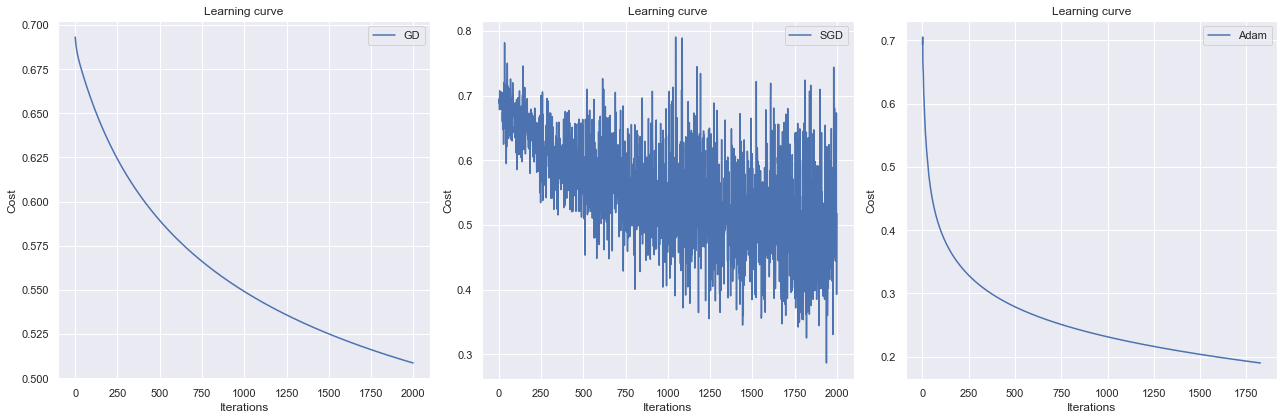

Learning rate: 0.0055
GD results:
train accuracy: 77.568 %
test accuracy: 74.627 %

SGD results:
train accuracy: 77.320 %
test accuracy: 73.881 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 93.779 %
test accuracy: 73.881 %


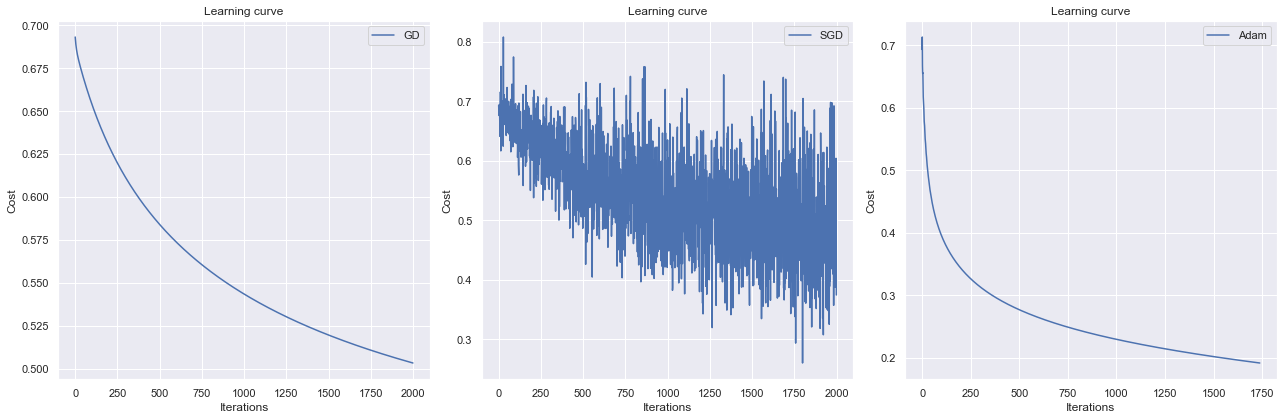

Learning rate: 0.006
GD results:
train accuracy: 77.533 %
test accuracy: 74.733 %

SGD results:
train accuracy: 77.604 %
test accuracy: 74.947 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 93.850 %
test accuracy: 74.200 %


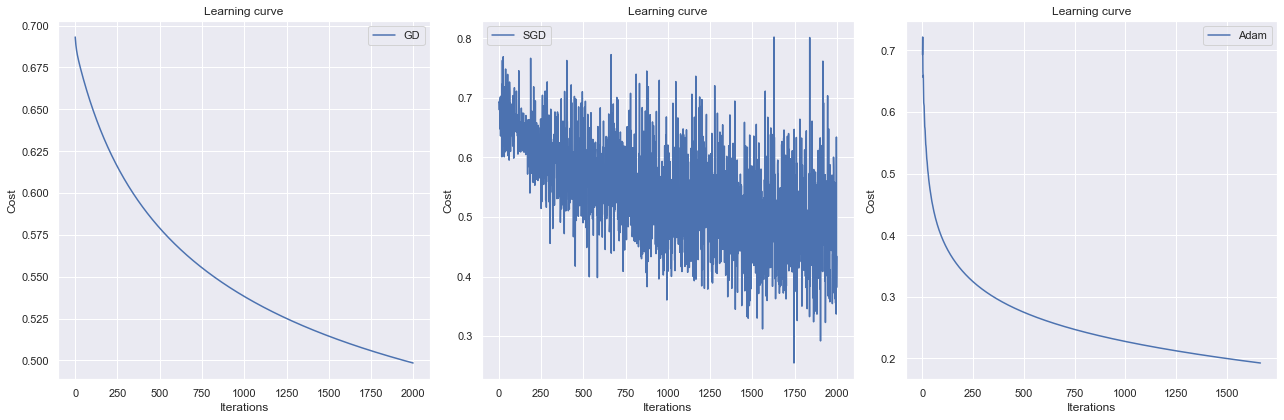

Learning rate: 0.006500000000000001
GD results:
train accuracy: 77.888 %
test accuracy: 74.947 %

SGD results:
train accuracy: 77.675 %
test accuracy: 74.627 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 93.921 %
test accuracy: 74.200 %


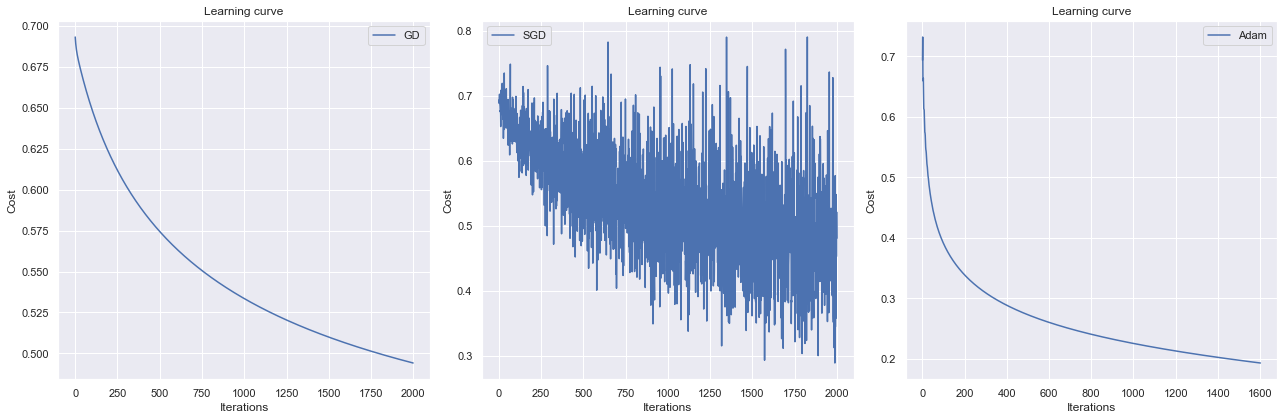

Learning rate: 0.007
GD results:
train accuracy: 77.959 %
test accuracy: 75.267 %

SGD results:
train accuracy: 77.640 %
test accuracy: 75.586 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.028 %
test accuracy: 74.094 %


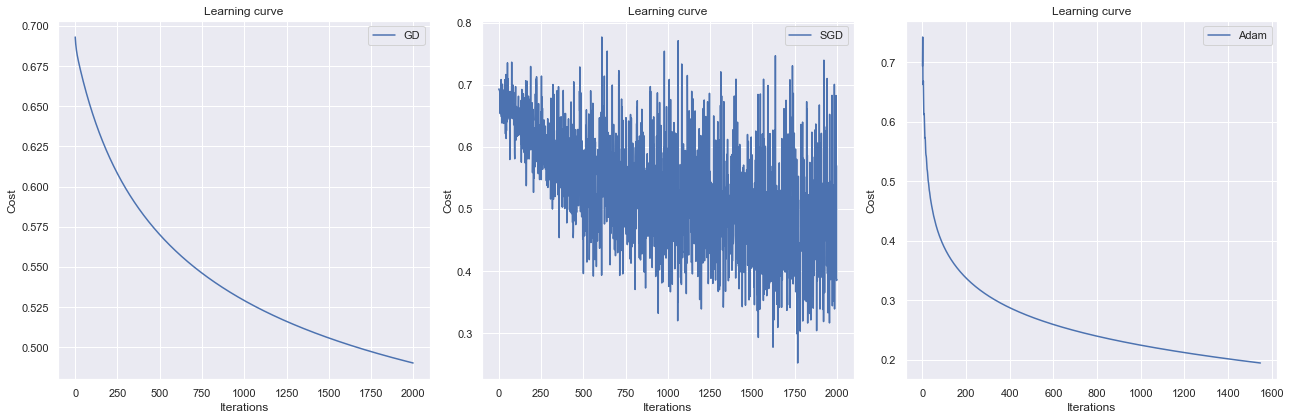

Learning rate: 0.0075
GD results:
train accuracy: 77.959 %
test accuracy: 75.373 %

SGD results:
train accuracy: 78.422 %
test accuracy: 76.119 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.028 %
test accuracy: 73.987 %


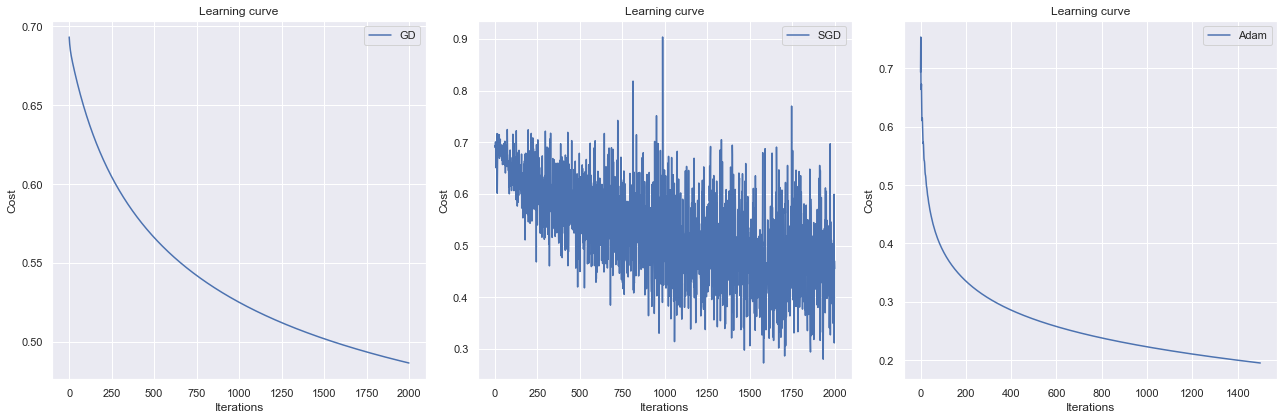

Learning rate: 0.008
GD results:
train accuracy: 78.244 %
test accuracy: 75.693 %

SGD results:
train accuracy: 77.640 %
test accuracy: 75.800 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.134 %
test accuracy: 73.881 %


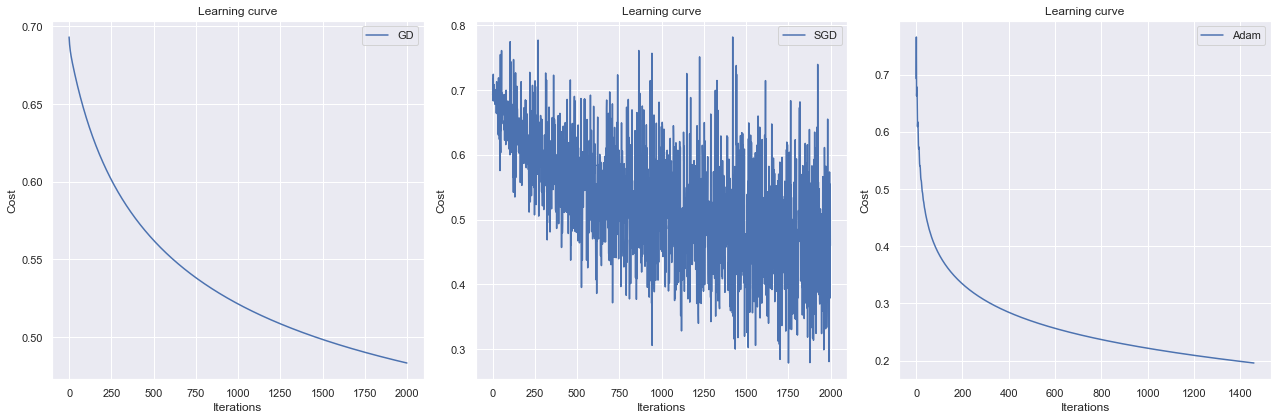

Learning rate: 0.0085
GD results:
train accuracy: 78.351 %
test accuracy: 75.800 %

SGD results:
train accuracy: 77.817 %
test accuracy: 75.586 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.134 %
test accuracy: 73.774 %


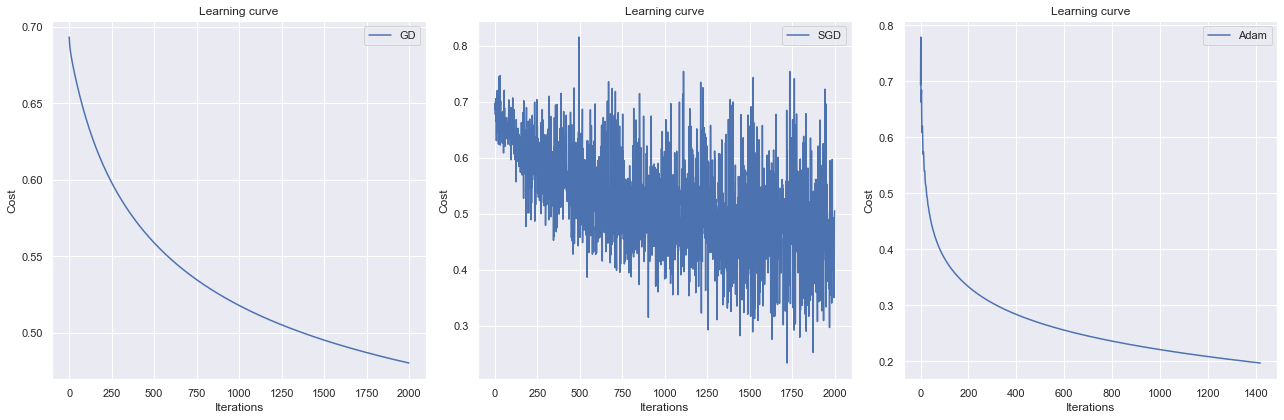

Learning rate: 0.009000000000000001
GD results:
train accuracy: 78.564 %
test accuracy: 75.800 %

SGD results:
train accuracy: 78.457 %
test accuracy: 75.800 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.205 %
test accuracy: 73.561 %


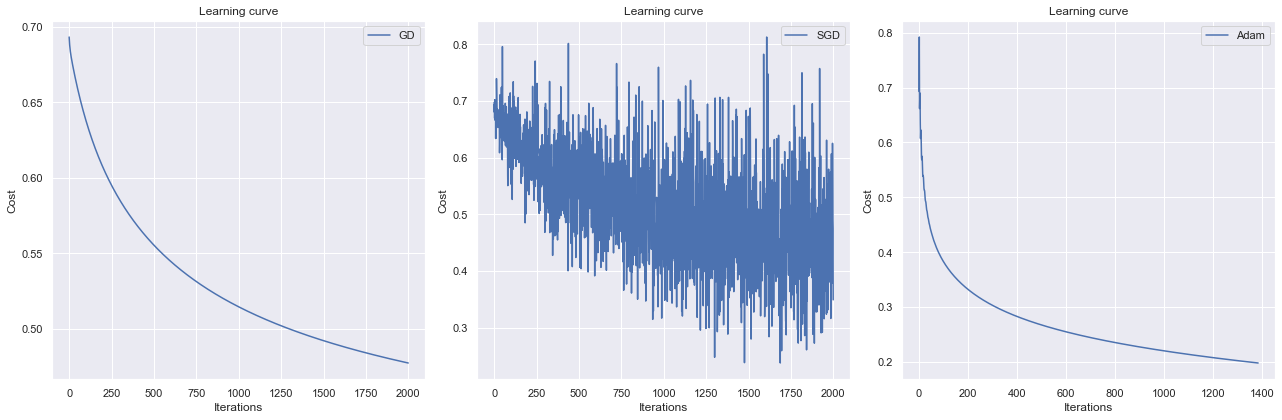

Learning rate: 0.0095
GD results:
train accuracy: 78.777 %
test accuracy: 76.119 %

SGD results:
train accuracy: 78.315 %
test accuracy: 75.586 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.241 %
test accuracy: 73.561 %


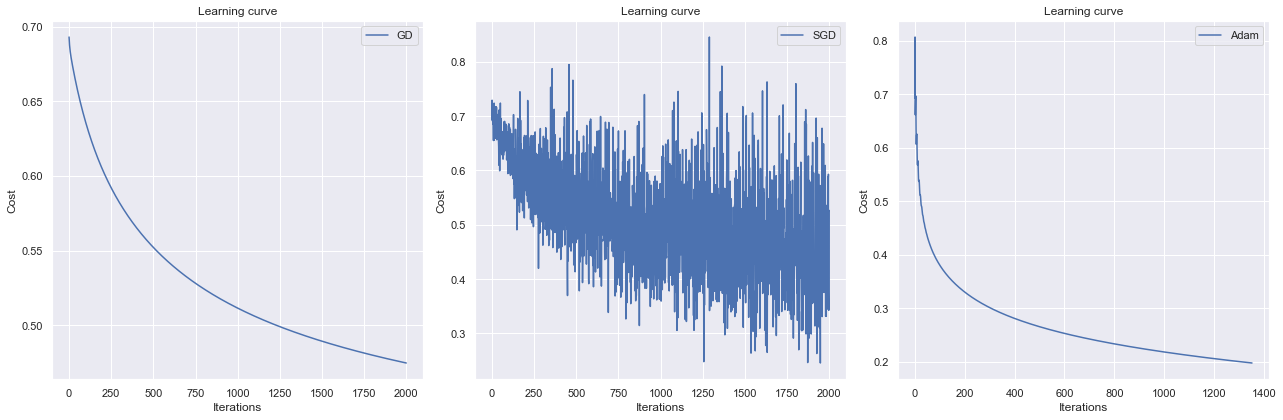

Learning rate: 0.01
GD results:
train accuracy: 78.990 %
test accuracy: 76.226 %

SGD results:
train accuracy: 78.208 %
test accuracy: 76.333 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.241 %
test accuracy: 73.667 %


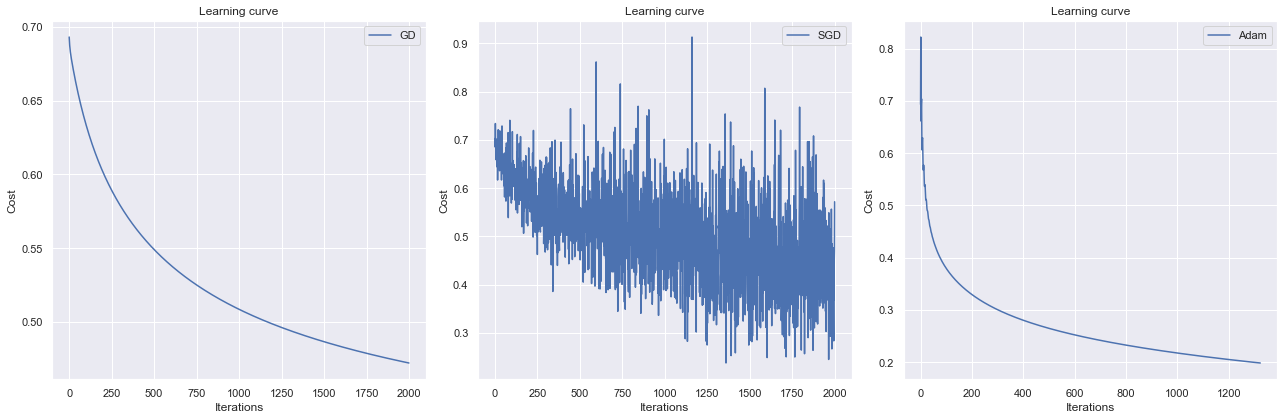

Learning rate: 0.0105
GD results:
train accuracy: 78.955 %
test accuracy: 76.226 %

SGD results:
train accuracy: 78.564 %
test accuracy: 76.226 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.241 %
test accuracy: 73.454 %


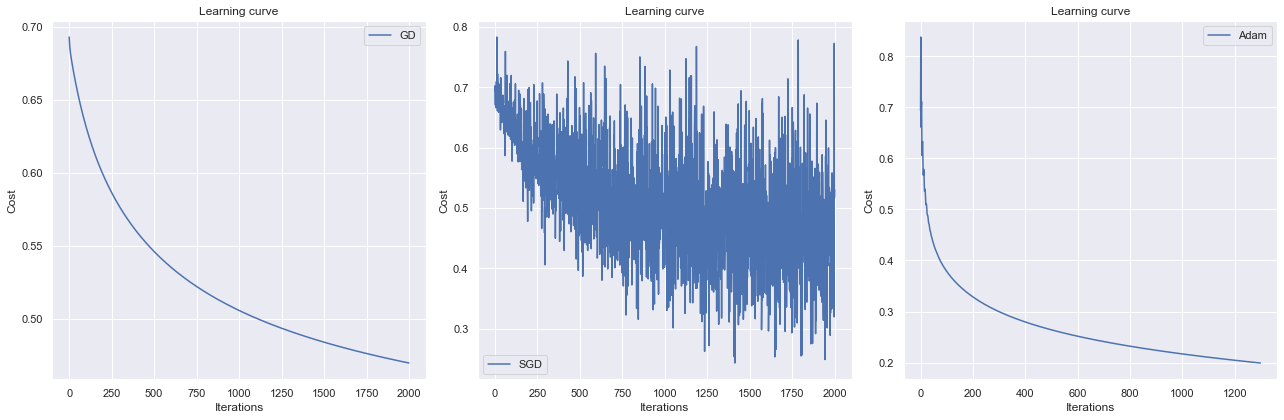

Learning rate: 0.011
GD results:
train accuracy: 79.310 %
test accuracy: 76.226 %

SGD results:
train accuracy: 78.351 %
test accuracy: 76.119 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.312 %
test accuracy: 73.454 %


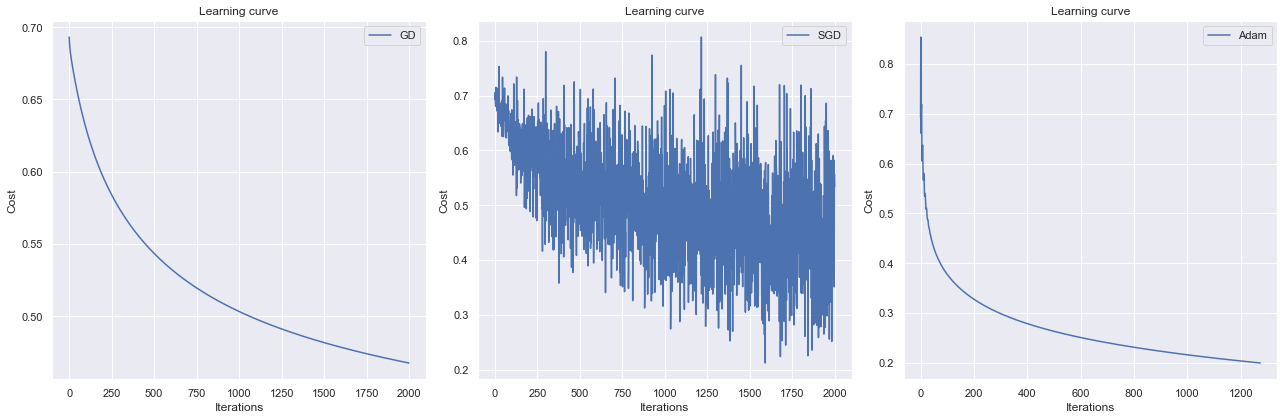

Learning rate: 0.0115
GD results:
train accuracy: 79.595 %
test accuracy: 76.439 %

SGD results:
train accuracy: 78.386 %
test accuracy: 75.800 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.312 %
test accuracy: 73.454 %


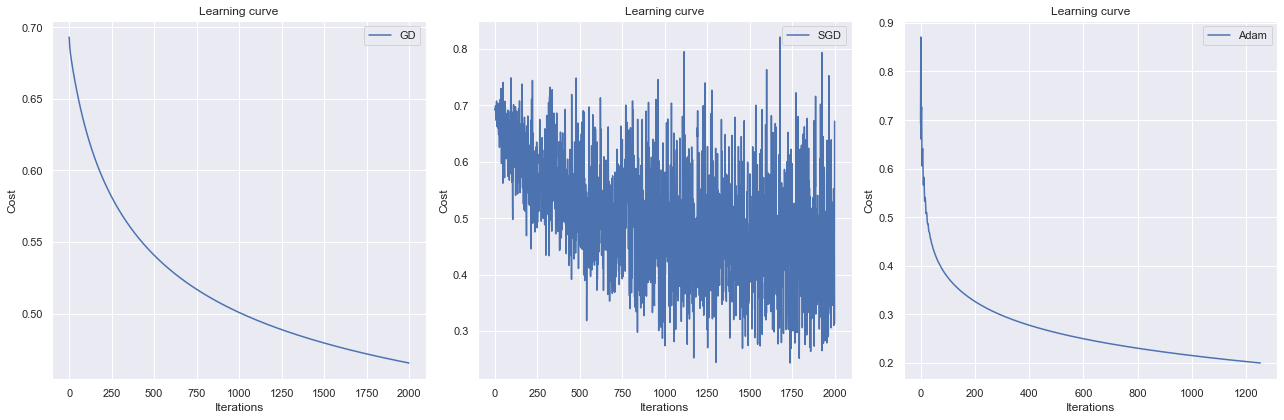

Learning rate: 0.012
GD results:
train accuracy: 79.701 %
test accuracy: 76.546 %

SGD results:
train accuracy: 78.528 %
test accuracy: 76.866 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.383 %
test accuracy: 73.561 %


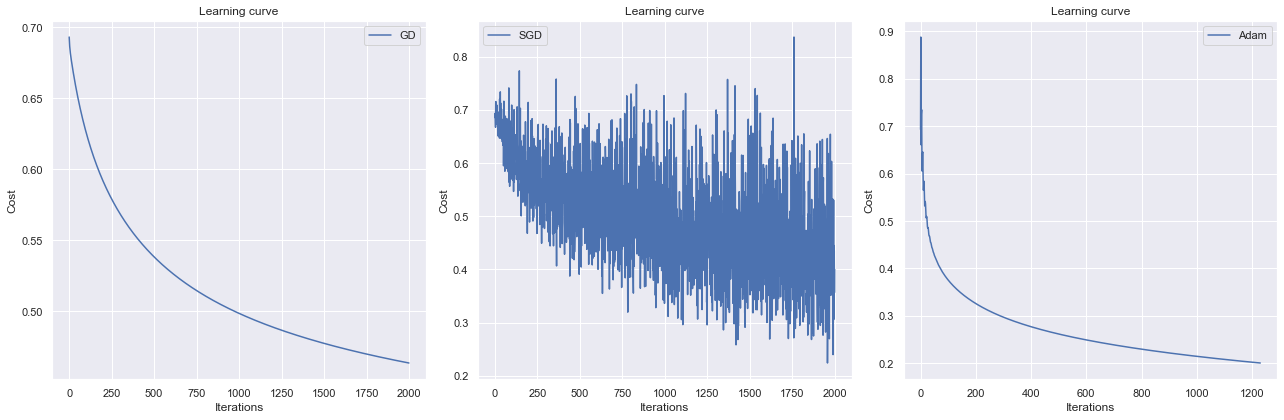

Learning rate: 0.0125
GD results:
train accuracy: 79.808 %
test accuracy: 76.759 %

SGD results:
train accuracy: 78.706 %
test accuracy: 75.800 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.348 %
test accuracy: 73.561 %


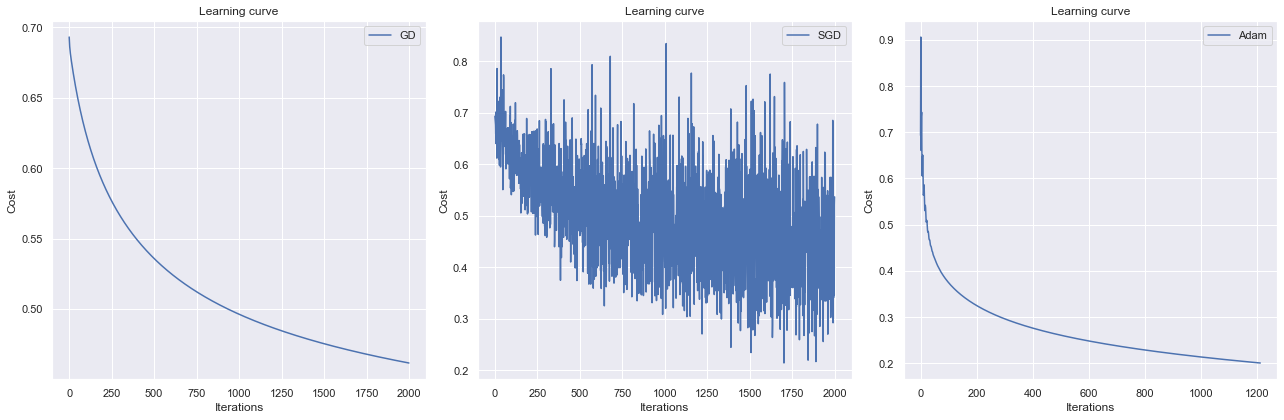

Learning rate: 0.013000000000000001
GD results:
train accuracy: 79.915 %
test accuracy: 76.972 %

SGD results:
train accuracy: 78.599 %
test accuracy: 76.226 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.348 %
test accuracy: 73.667 %


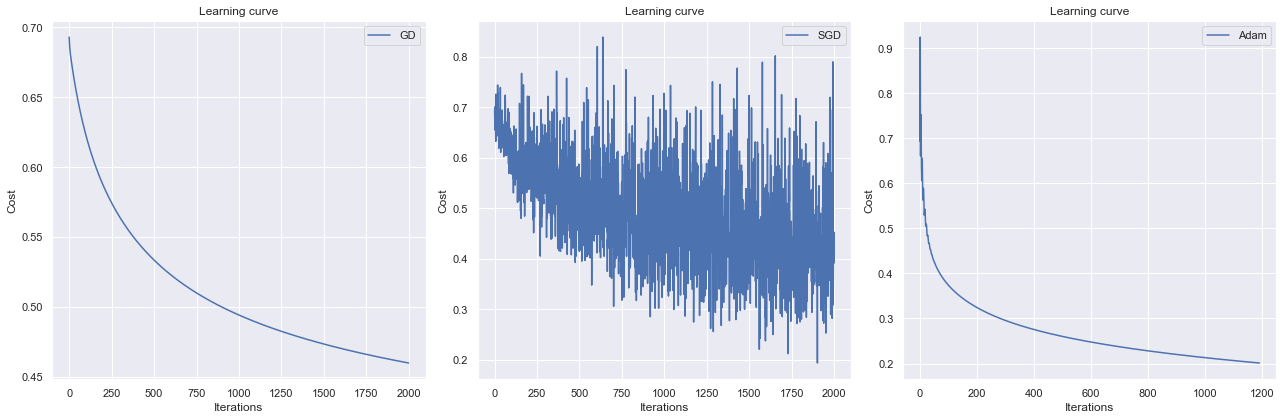

Learning rate: 0.0135
GD results:
train accuracy: 79.950 %
test accuracy: 76.972 %

SGD results:
train accuracy: 79.026 %
test accuracy: 76.333 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.419 %
test accuracy: 73.774 %


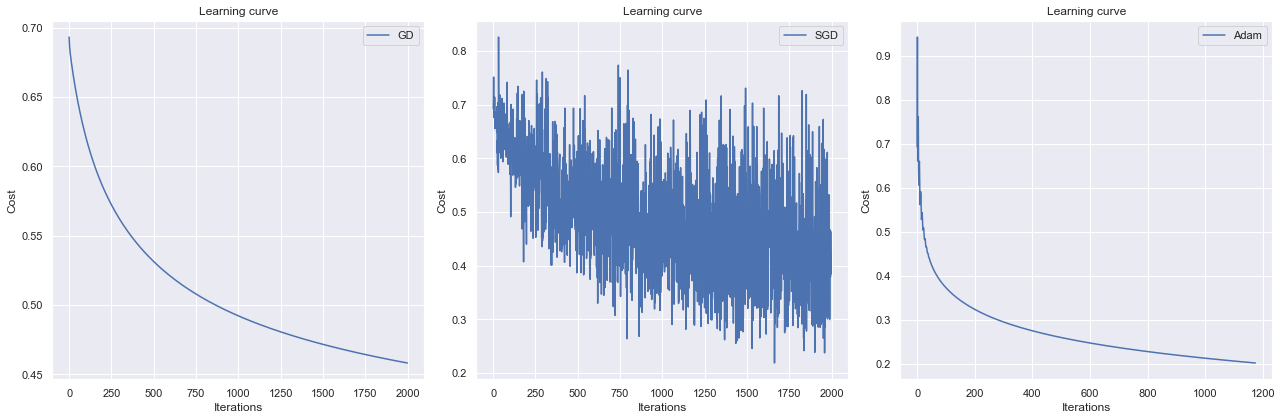

Learning rate: 0.014
GD results:
train accuracy: 80.057 %
test accuracy: 76.972 %

SGD results:
train accuracy: 78.777 %
test accuracy: 76.546 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.490 %
test accuracy: 73.667 %


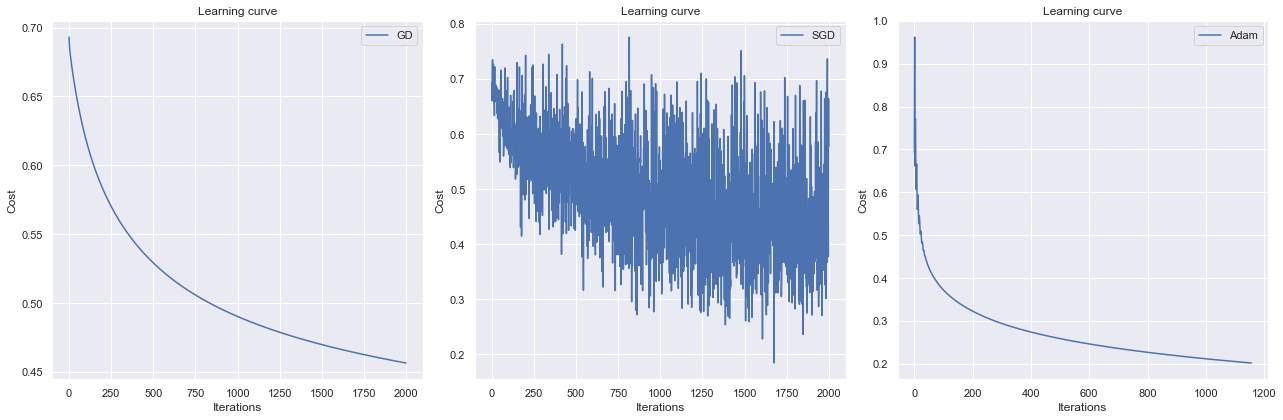

Learning rate: 0.0145
GD results:
train accuracy: 80.092 %
test accuracy: 77.079 %

SGD results:
train accuracy: 78.777 %
test accuracy: 76.226 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.490 %
test accuracy: 73.561 %


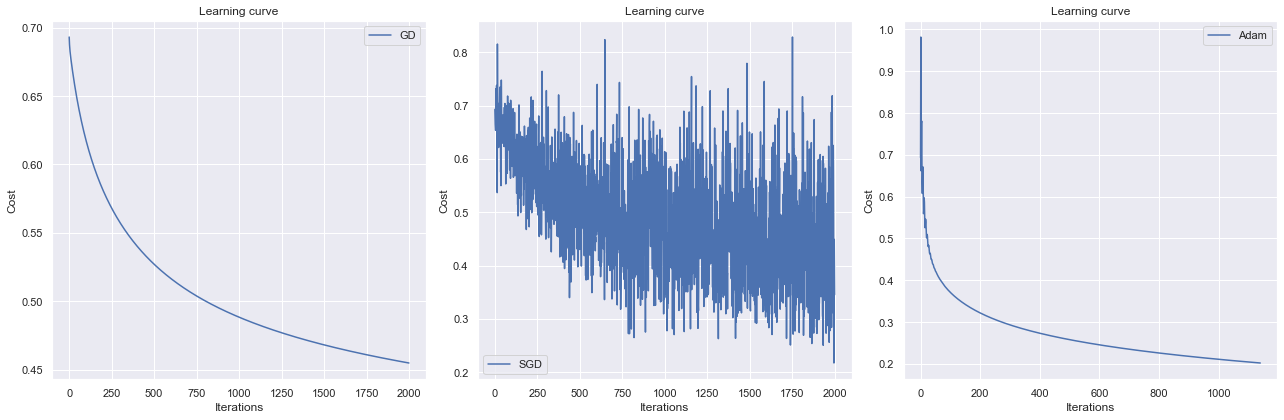

Learning rate: 0.015
GD results:
train accuracy: 80.235 %
test accuracy: 76.972 %

SGD results:
train accuracy: 78.635 %
test accuracy: 75.586 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.490 %
test accuracy: 73.561 %


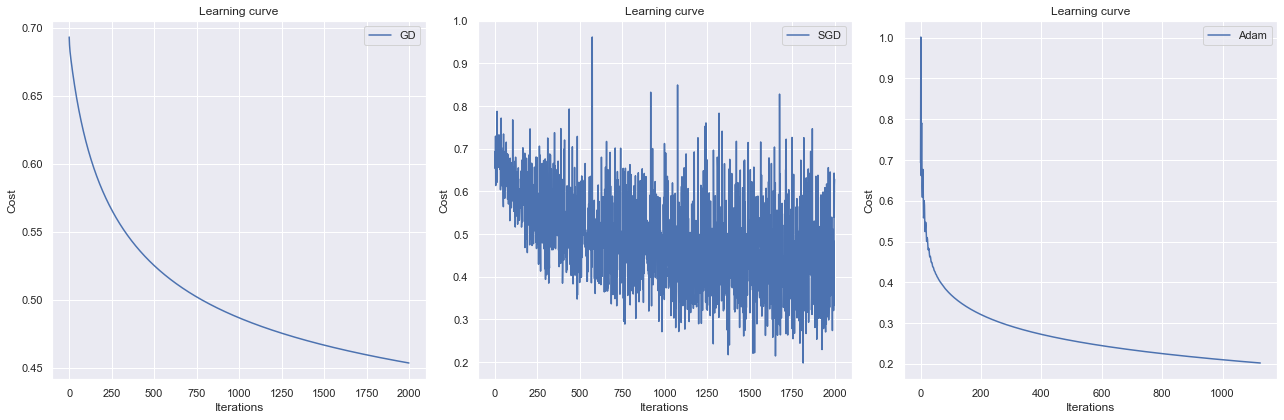

Learning rate: 0.0155
GD results:
train accuracy: 80.128 %
test accuracy: 76.972 %

SGD results:
train accuracy: 79.275 %
test accuracy: 76.759 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.490 %
test accuracy: 73.454 %


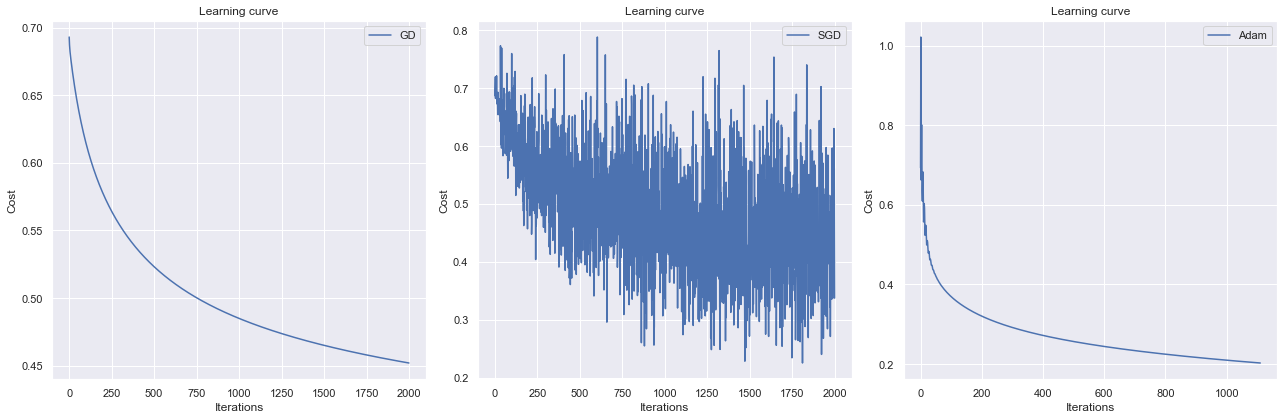

Learning rate: 0.016
GD results:
train accuracy: 80.199 %
test accuracy: 76.972 %

SGD results:
train accuracy: 79.239 %
test accuracy: 76.546 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.490 %
test accuracy: 73.454 %


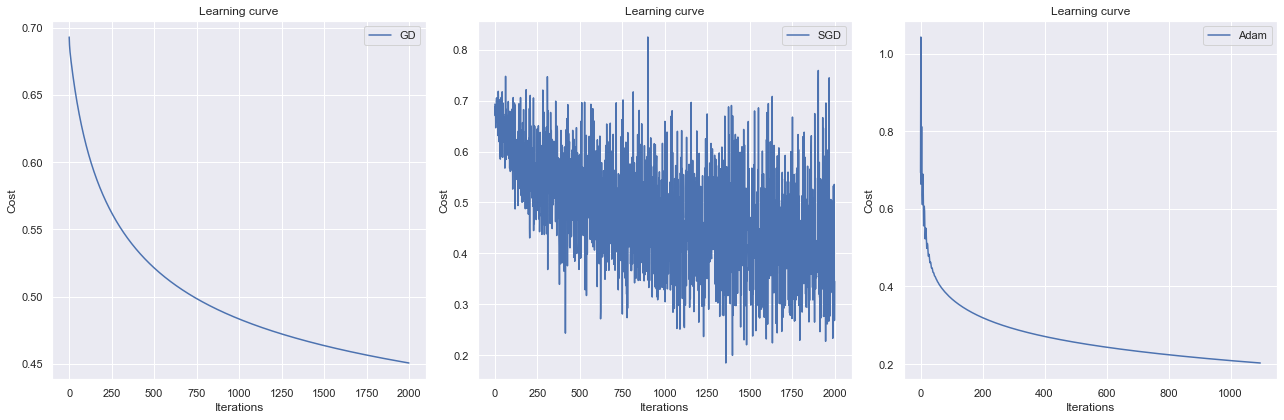

Learning rate: 0.0165
GD results:
train accuracy: 80.164 %
test accuracy: 76.972 %

SGD results:
train accuracy: 78.457 %
test accuracy: 75.267 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.490 %
test accuracy: 73.454 %


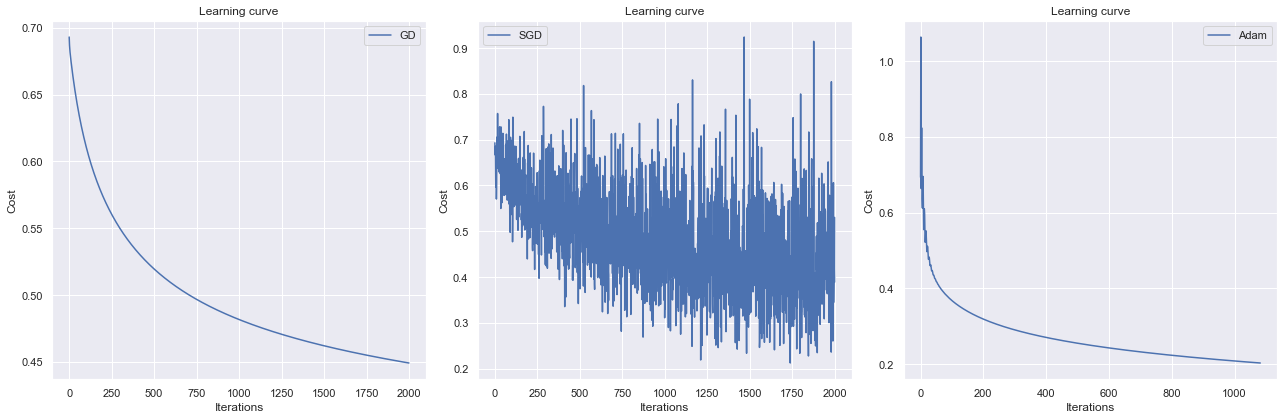

Learning rate: 0.017
GD results:
train accuracy: 80.270 %
test accuracy: 76.866 %

SGD results:
train accuracy: 78.848 %
test accuracy: 76.226 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.525 %
test accuracy: 73.241 %


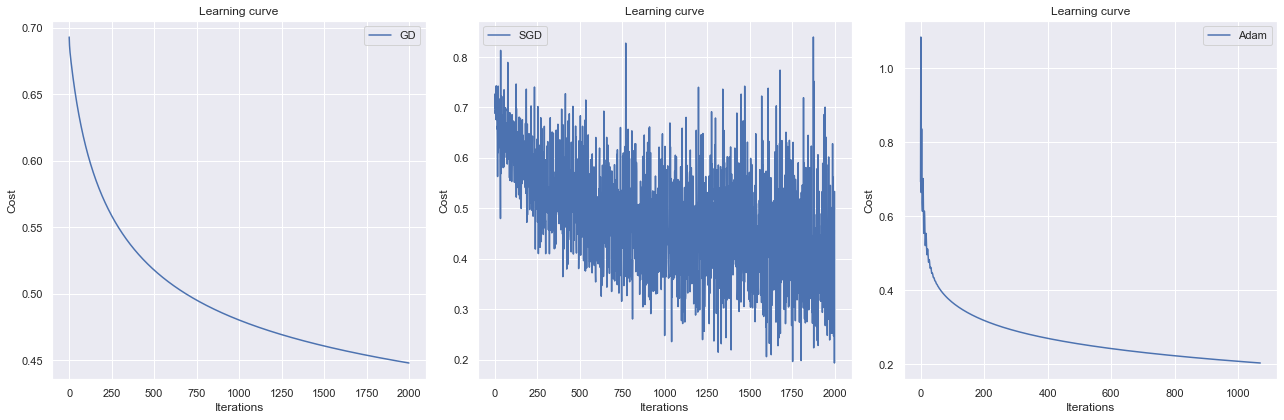

Learning rate: 0.0175
GD results:
train accuracy: 80.341 %
test accuracy: 76.866 %

SGD results:
train accuracy: 79.381 %
test accuracy: 76.226 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.525 %
test accuracy: 73.241 %


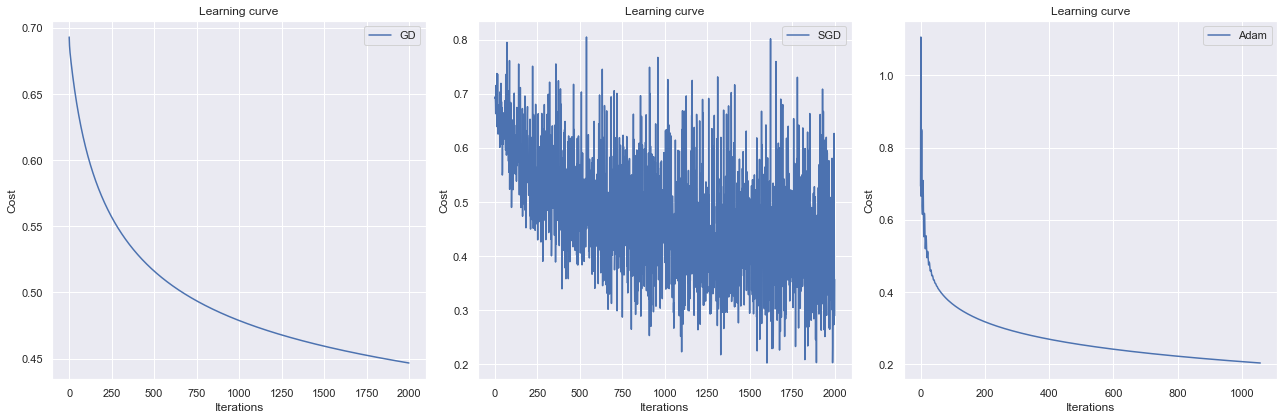

Learning rate: 0.018000000000000002
GD results:
train accuracy: 80.412 %
test accuracy: 76.866 %

SGD results:
train accuracy: 79.346 %
test accuracy: 76.439 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.525 %
test accuracy: 73.241 %


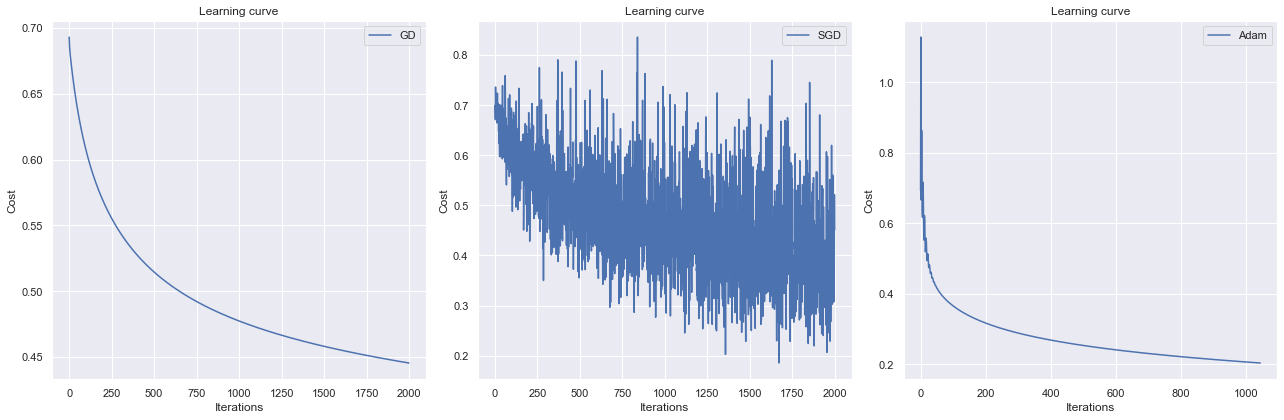

Learning rate: 0.0185
GD results:
train accuracy: 80.448 %
test accuracy: 77.079 %

SGD results:
train accuracy: 79.666 %
test accuracy: 76.759 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.561 %
test accuracy: 73.348 %


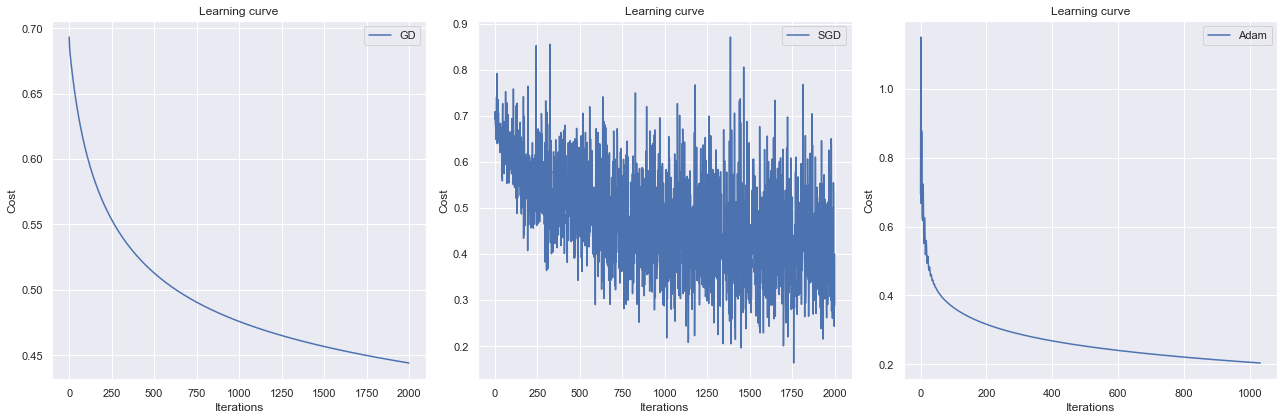

Learning rate: 0.019
GD results:
train accuracy: 80.590 %
test accuracy: 77.186 %

SGD results:
train accuracy: 78.706 %
test accuracy: 74.947 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.739 %
test accuracy: 73.348 %


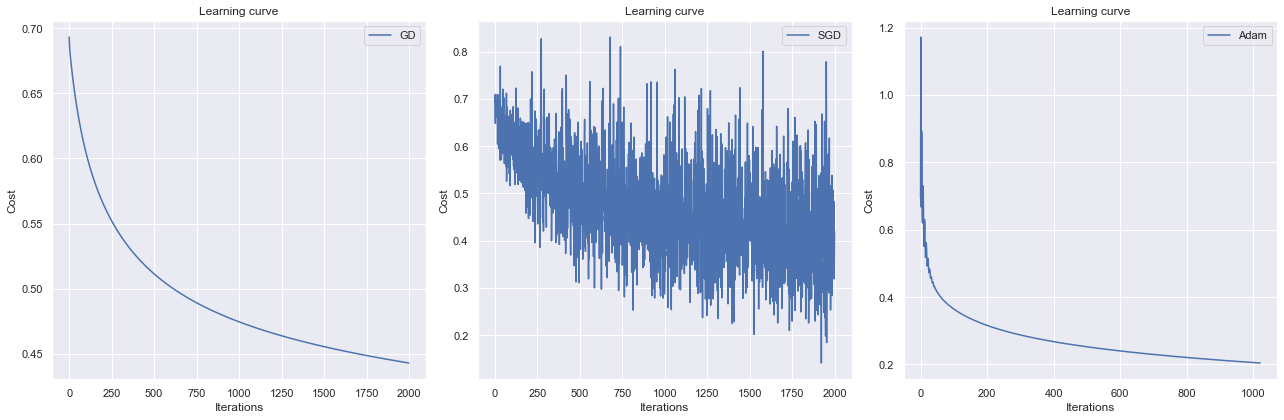

Learning rate: 0.0195
GD results:
train accuracy: 80.626 %
test accuracy: 77.292 %

SGD results:
train accuracy: 79.630 %
test accuracy: 76.652 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.739 %
test accuracy: 73.241 %


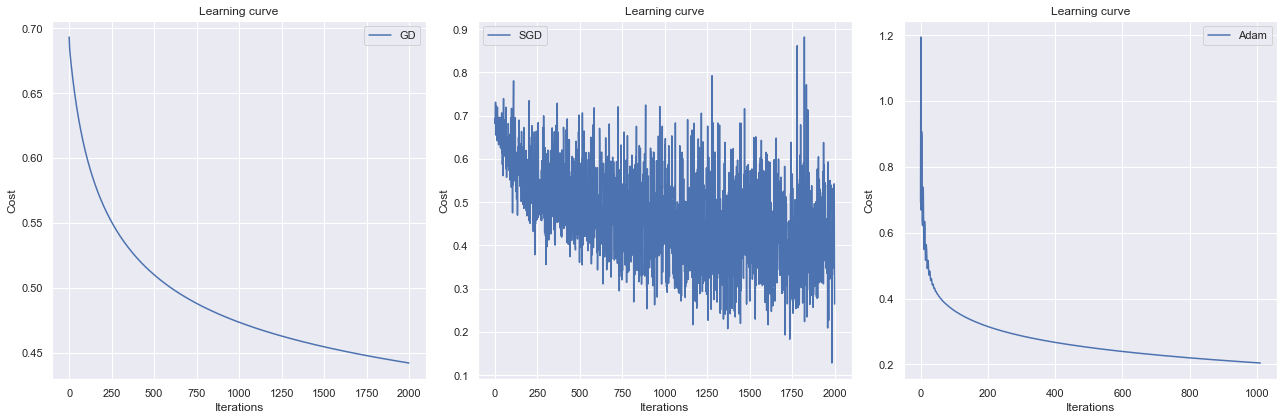

Learning rate: 0.02
GD results:
train accuracy: 80.839 %
test accuracy: 77.292 %

SGD results:
train accuracy: 79.666 %
test accuracy: 76.972 %

Adam results:


<ipython-input-4-aa97e7812710>:53: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost
<ipython-input-4-aa97e7812710>:53: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)   # compute cost


train accuracy: 94.739 %
test accuracy: 73.134 %


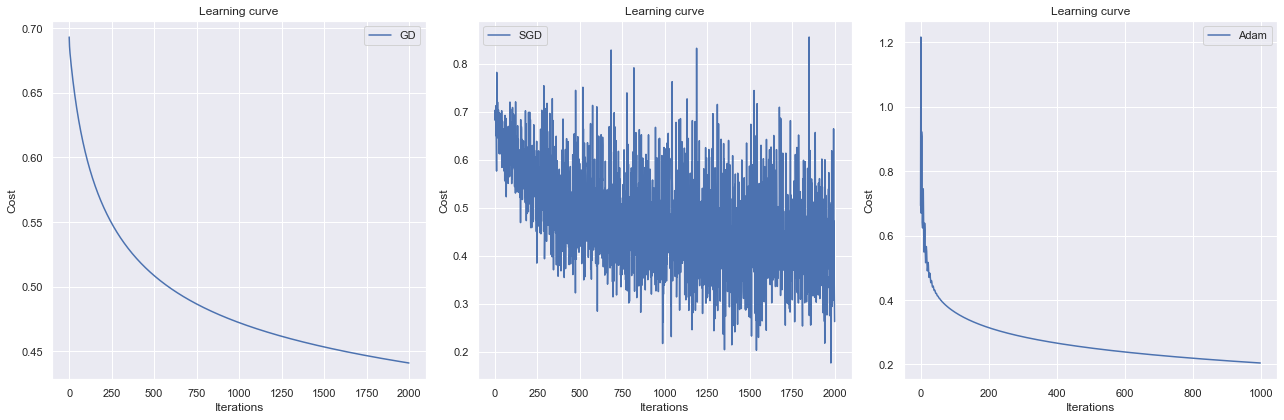

In [15]:
for lr in np.arange(0, 2 * 1e-2 + 5e-4, 0.0005)[1:]:
    print(f"Learning rate: {lr}")
    print(f"GD results:")
    gd = model(
        train_set_x, 
        train_set_y, 
        test_set_x, 
        test_set_y, 
        learning_rate = round(lr, 4), 
        optimizer = "gd"
    )
    print(f"\nSGD results:")
    sgd = model(
        train_set_x, 
        train_set_y, 
        test_set_x, 
        test_set_y, 
        learning_rate = round(lr, 4), 
        optimizer = "sgd",
        batch_size = 16
    )
    print(f"\nAdam results:")
    adam = model(
        train_set_x, 
        train_set_y, 
        test_set_x, 
        test_set_y, 
        learning_rate = round(lr, 4), 
        optimizer = "adam",
    )
    models = {
        "GD": gd,
        "SGD": sgd,
        "Adam": adam
    }
    plot_curves(models)

**Best results**\
_Learning rate:_ 0.02
1. GD results:
 - train accuracy: 80.839 %
 - test accuracy: 77.292 %

2. SGD results: 
 - train accuracy: 79.666 %
 - test accuracy: 76.972 %

3. Adam results:
 - train accuracy: 94.739 %
 - test accuracy: 73.134 %


When running the logistic regression algorithm at different rates, the best accuracy was achieved at learning rate = 0.02. At lower speeds, the Adam optimizer performs better.